In [637]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
import numpy as np
from scipy.special import expit as sigmoid
dir_path = os.getcwd()


# Exercise 1: Learning in discrete graphical models

Soit les observations $Y = (Y_1, ..., Y_n)$ avec 

$$
Y_i = 
 \bigg(
    \begin{array}{ll}
        X_i \\
        Z_i
    \end{array}
 \bigg)
$$

alors 
$$ p(y) = \prod_i p(y_i) = \prod_i p(x_i | z_i) p(z_i) = \prod_i \theta_{z_i x_i} \pi_{z_i} $$
$$ p(y) = \prod_{m \in \mathcal{M}} \pi_m^{n_m} \prod_{m \in \mathcal{M}, k \in \mathcal{K}} \theta_{mk}^{n_{mk}} $$ où 
$n_{mk} = \sum_i \mathbb{1}\{x_i = k, z_i = m\} =$ "Nombre de couples $(k, m)$ dans les observations"

et 

$n_m = \sum_i \sum_k n_{m, k} = \sum_i \mathbb{1}\{z_i = m\} =$ "Nombre d'observations où  $z_i = m$"

Alors, on veut maximiser
$$ log(p(y)) = \sum_m n_m log(\pi_m) + \sum_{m, k} n_{mk} log(\theta_{mk})$$
sous les contraintes 
$\sum_m \pi_m = 1$
et
$\sum_{m, k} \theta_{mk} = 1$

Posons donc le Lagrangien :

$$ \mathcal{L}(\pi, \theta, \lambda, \mu) =  \sum_m n_m log(\pi_m) + \sum_{m, k} n_{mk} log(\theta_{mk}) - \lambda(\sum_m \pi_m - 1) - \mu(\sum_{m, k} \theta_{mk} - 1)$$ 

En dérivant par rapport à $\pi$:
$$ \frac{\partial \mathcal{L}}{\partial \pi_m} = \frac{n_m}{\pi_m} - \lambda = 0  \Rightarrow \pi_m = \frac{n_m}{\lambda}$$ or avec la contrainte $$\sum_m \pi_m = 1 \Rightarrow \hat{\pi}_m = \frac{n_m}{n}$$

De même, en dérivant par rapport à $\theta$:
$$ \frac{\partial \mathcal{L}}{\partial \theta_{mk}} = \frac{n_{mk}}{\theta_{mk}} - \mu = 0  \Rightarrow \theta_{mk} = \frac{n_{mk}}{\mu}$$ or avec la contrainte $$\sum_{m, k} \theta_{mk} = 1 \Rightarrow \hat{\theta}_{mk} = \frac{n_{mk}}{n}$$

# Exercice 2 :  Linear classification

In [638]:
modelNames = ['A', 'B', 'C']
d_types = ['train', 'test']
data = dict()
for model in modelNames:
    for d_type in d_types:
        path = dir_path +"/"+"classification_data_HWK1/classification" +model +'.' + d_type 
        data[model+'_'+d_type] = pd.read_csv(path, sep='\t', header=None).values

### 1) Generative model: LDA

(a) Pour une seule observation :
$$ p(y|x) \propto p(x|y)p(y) = \pi^y (1-\pi)^{1-y} p(x|y)$$
$$ p(y|x) \propto \pi^y (1-\pi)^{1-y} (det(\Sigma))^{-1/2} exp(-\frac{y}{2}(x-\mu_1)^T \Sigma^{-1} (x-\mu_1) - \frac{1-y}{2}(x - \mu_0)^T \Sigma^{-1}(x-\mu_0)) $$

$$ p(y|x) \propto \pi^y (1-\pi)^{1-y} (det(\Sigma))^{-1/2} \ exp\big(y x^T \Sigma^{-1} (\mu_1 - \mu_0) + \frac{y}{2}(\mu_0^T \Sigma^{-1}\mu_0 - \mu_1^T \Sigma^{-1}\mu_1) -\frac{1}{2}(x - \mu_0)^T \Sigma^{-1}(x-\mu_0)\big) $$

Donc, pour n observations $(X_i, Y_i)$ iid, on a :

$$ log\big(p(y|x)\big) = log(\pi)\sum_i y_i + log(1-\pi)\sum_i(1- y_i) -\frac{1}{2}det(\Sigma) + \sum_i y_i x_i^T\Sigma^{-1}(\mu_1 - \mu_0) + (\mu_0^T \Sigma^{-1}\mu_0 - \mu_1^T \Sigma^{-1}\mu_1)\sum_i \frac{y_i}{2} \\ -\frac{1}{2}\sum_i (x_i - \mu_0)^T \Sigma^{-1}(x_i-\mu_0) + Cste  $$

donc 
$$
\nabla_{\mu_0}\Big(log\big(p(y|x)\big)\Big) = - \sum_i y_i x_i^T \Sigma^{-1} + 2 \mu_0^T \Sigma^{-1} \sum_i \frac{y_i}{2} + \sum_i (x_i-\mu_0)^T \Sigma^{-1} = 0 
$$

$$ \Leftrightarrow  \mu_0^T  \sum_i y_i + \sum_i x_i^T - \mu_0^T \sum_i 1  = \sum_i y_i x_i^T $$

$$ \Leftrightarrow  \mu_0^T  \sum_i (1-y_i) = \sum_i x_i^T(1-y_i)  $$
$$ \Leftrightarrow  \hat{\mu}_0 = \frac{\sum_i x_i^T(1-y_i)}{\sum_i (1-y_i)}  $$
donc l'estimateur du maximum de vraisemblance pour $\mu_0$ est la moyenne empirique des $x_i$ pour les observations où $y_i = 0$

et


$$\nabla_{\mu_1}\Big(log\big(p(y|x)\big)\Big) = \sum_i y_i x_i^T \Sigma^{-1} - 2 \mu_1^T \Sigma^{-1} \sum_i \frac{y_i}{2}  = 0 $$
$$ \Leftrightarrow \sum_i y_i x_i = \mu_1 \sum_i y_i $$
$$ \Leftrightarrow  \hat{\mu}_1  = \frac{\sum_i y_i x_i}{\sum_i y_i} $$
donc l'estimateur du maximum de vraisemblance pour  $\mu_1$  est la moyenne empirique des $x_i$ pour les observations où $y_i=1$

$$\nabla_\pi \Big(log\big(p(y|x)\big)\Big) = \frac{\sum_i y_i}{\pi} - \frac{\sum_i (1-y_i)}{1-\pi} = 0$$
$$\Leftrightarrow \hat{\pi} = \frac{\sum_i y_i}{n}  $$
donc l'estimateur du maximum de vraisemblance de $\pi$ est la moyenne empirique des $y_i$

Calcul de l'estimateur de $\Sigma$ (à faire)
$$\hat{\Sigma} =\frac{1}{n} \Big(\sum_i y_i(x_i - \mu_0)(x_i - \mu_0)^{T} + \sum_i (1-y_i)(x_i - \mu_1)(x_i - \mu_1)^{T} \Big) $$


$$
p(y = 1|x) = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=0)p(y=0)} = \frac{1}{1+\frac{p(x|y=1)p(y=1)}{p(x|y=0)p(y=0)}}
$$
$$
p(y = 1|x) = \frac{1}{1+\frac{\pi}{1-\pi}exp\big( +\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) - \frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1) \big)}
$$
$$
p(y = 1|x) = \frac{1}{1+exp\big( x^T\Sigma^{-1}(\mu_1-\mu_0) + \frac{1}{2}(\mu_0^T\Sigma^{-1}\mu_0 - \mu_1^T\Sigma^{-1}\mu_1) + log(\frac{\pi}{1-\pi})\big)} = \sigma\big( a^T x + b \big)
$$
avec $a = (\mu_0-\mu_1)^T\Sigma^{-1} $ et $b = \frac{1}{2}(\mu_1^T\Sigma^{-1}\mu_1 - \mu_0^T\Sigma^{-1}\mu_0) - log(\frac{\pi}{1-\pi})$

In [639]:
from numpy.linalg import inv

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def plotLDAForModel(modelName): 
    fig, ax = plt.subplots()
    
    dataForModel = data[modelName+ '_train']
    
    # x0 est l'ensemble des xi pour lesquels yi = 0
    x0 = dataForModel[:, 0:2][dataForModel[:, 2]==0]
    mu0 = np.mean(x0, axis=0)
    
    # x1 est l'ensemble des xi pour lesquels yi = 1
    x1 = dataForModel[:, 0:2][dataForModel[:, 2]==1]
    mu1 = np.mean(x1, axis=0)
    
    pi = np.mean(dataForModel[:, 2])

    sigma = (np.dot((x0 - mu0).T, x0 - mu0) + np.dot((x1 - mu1).T, x1 - mu1))/dataForModel.shape[0]
    sigmainv = inv(sigma)

    a = np.dot((mu0 - mu1).T, sigmainv)
    b = 1/2 * (- np.dot(mu0.T, np.dot(sigmainv, mu0)) + np.dot(mu1.T, np.dot(sigmainv, mu1)) ) - np.log(pi/(1-pi))

    x0min = np.min(dataForModel[:, 0])
    x0max = np.max(dataForModel[:, 0])
    
    xx0 = np.arange(x0min, x0max, (x0max-x0min)/100)
    xx1 = -a[0]/a[1]*xx0 - b/a[1]
    ax.plot(xx0, xx1)
    
    x_abs = dataForModel[:, 0]
    x_ord = dataForModel[:, 1]
    y = dataForModel[:, 2]
    ax.scatter(x_abs, x_ord, c = y)
    
    
    title = "LDA Data plot for Model "+modelName
    plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')

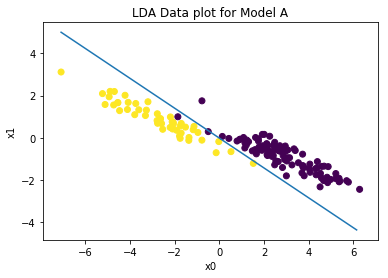

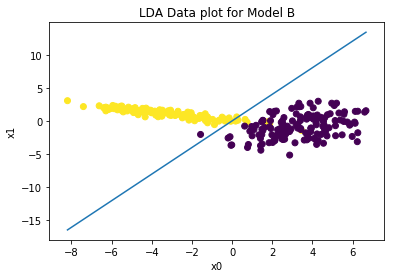

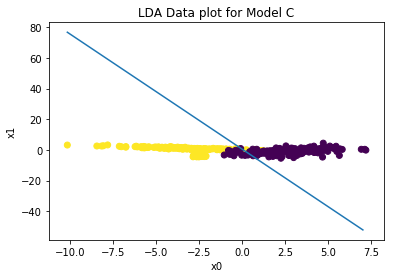

In [640]:
for name in modelNames:
    plotLDAForModel(name)

### 2) Logistic Regression

f is of the form $ f(x) = w^TX + b . \ $ <br>
We can augment X with a row of 1 to remove b of the Equation. <br>
f thus become $ f(x) = w^T\tilde{X} $ <br>
with $\tilde{X} = (X, 1)$

We will need to solve the Modified normal equations using the Newton's method described in the class material


Then if we want to plot $ p(y = 1|x) = 0.5 $ we need to solve the equation $$  \frac{\mathrm{1} }{\mathrm{1} + e^-f(x) } = 0.5  $$ which is equivalent to solving $ f(x) = 0 $ 

We thus need to represent the line of equation $ x_2 = \frac{- b - w_1*x_1}{w_2} $


In [641]:
w0init = dict()
w0init['A'] = np.array([[0.7705846734165602], [0.5281598619924476], [0.41861207653102495]])
w0init['B'] = np.array([[0.2237963501074024], [0.03727566587354736], [0.5629049044816309]])
w0init['C'] = np.array([[0.12116464647012481], [0.2976639368542129], [0.5205404651440133]])



In [642]:
def getLogRegParametersForModel(modelName):
    Y = np.copy(data[modelName +'_train'][:, 2:3])
    X = np.copy(data[modelName + '_train'][:, 0:3])
    
    # we replace the third row by the augmented row
    X[:, 2] = 1
    X_t = np.transpose(X)
    
    w = w0init[modelName]
    eta = np.transpose(sigmoid(np.dot(np.transpose(w), X_t)))
    etaa = eta*(1-eta)
    D = np.diag(etaa[:, 0])
    Y_tilde = Y - eta
    
    for t in range(1000):   
        inv = np.linalg.inv(np.dot(np.dot(X_t, D), X))
        first = np.dot(inv, X_t)
        second = np.dot(first, Y_tilde)
        w = w + second

        eta = np.transpose(sigmoid(np.dot(np.transpose(w), X_t)))
        etaa = eta*(1-eta)
        D0 = np.diag(etaa[:,0])
        Y_tilde = Y - eta
        
    return w0


In [664]:
def LogReg_proba_lim(x1,w1,w2,b):
    return -1/w2 * (w1 * x1 + b)

def plotLogRegForModel(modelName): 
    fig, ax = plt.subplots()
    
    dataForModel = data[modelName+ '_train']  
    x_abs = dataForModel[:, 0]
    x_ord = dataForModel[:, 1]
    y = dataForModel[:, 2]
    ax.scatter(x_abs, x_ord, c = y)
    
    x0min = np.min(dataForModel[:, 0])
    lowerBound = int(x0min)
    x0max = np.max(dataForModel[:, 0])
    upperBound = int(x0max) + 1
    
    w = getLogRegParametersForModel(modelName)
    plt.plot(range(lowerBound, upperBound), [LogReg_proba_lim(i,w[0],w[1],w[2]) for i in range(lowerBound, upperBound)])
    
    title = "Log Reg Data plot for Model "+modelName
    plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')

In [665]:
# for i in range (100):
#     if i % 100 == 0:
#         print(i)
#     try:
#         w0 = IRLS('C', i)
#         plotLogRegForModel('C', w0)
#     except:
#         pass
# todo remove

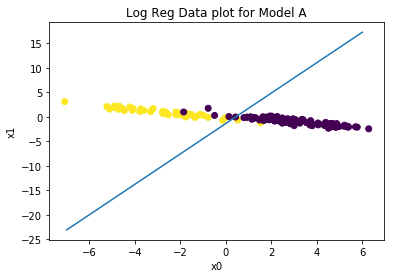

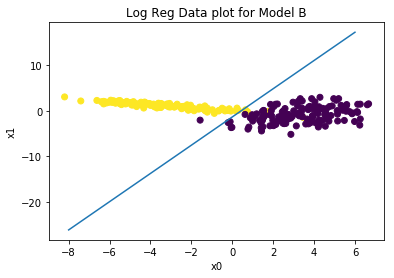

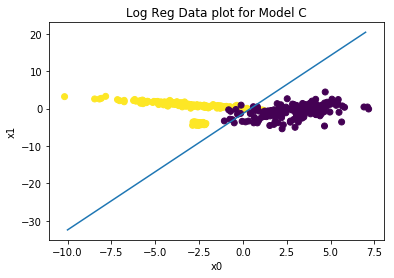

In [666]:
for name in modelNames:
    plotLogRegForModel(name)

### 3) Linear Regression

f is of the form $ f(x) = w^TX + b . \ $ <br>
We can augment X with a row of 1 to remove b of the Equation. <br>
f thus become $ f(x) = w^T\tilde{X} $ <br>
with $\tilde{X} = (X, 1)$

We need to solve the normal equation which is : $$ \tilde{X}^T\tilde{X}w-\tilde{X}^Ty=0 $$

In [646]:
def getLinRegParametersForModel(modelName):
    Y = np.copy(data[modelName +'_train'][:, 2:3])
    X = np.copy(data[modelName + '_train'][:, 0:3])
    # we replaced the third row by the augmented row
    X[:, 2] = 1
    
    rank = np.linalg.matrix_rank(X)
    if rank != 3:
        print("XtX isn't invertible")
    X_t = np.transpose(X)
    beta = np.dot(np.linalg.inv(np.dot(X_t, X)), np.dot(X_t, Y))
    return beta[0][0], beta[1][0], beta[2][0]
    

In [647]:
def printLinRegParametersForModel(modelName):
    omega0, omega1, b = getLinRegParametersForModel(name)
    print('For model {0} learnt parameters are :\n\tw = [{1:.3f},{2:.3f}]\n\tb = {3:.3f}\n'.format(name,
                                                                                                omega0,
                                                                                                omega1,
                                                                                                b))

In [648]:
for name in modelNames:
    printLinRegParametersForModel(name)

For model A learnt parameters are :
	w = [-0.264,-0.373]
	b = 0.492

For model B learnt parameters are :
	w = [-0.104,0.052]
	b = 0.500

For model C learnt parameters are :
	w = [-0.128,-0.017]
	b = 0.508



In [649]:
def plotLinRegForModel(modelName): 
    fig, ax = plt.subplots()
    
    dataForModel = data[modelName+ '_train']  
    x_abs = dataForModel[:, 0]
    x_ord = dataForModel[:, 1]
    y = dataForModel[:, 2]
    ax.scatter(x_abs, x_ord, c = y)
    
# TODO add equation p(y = 1 | x) = 0.5
    
    title = "Lin Reg Data plot for Model "+modelName
    plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')

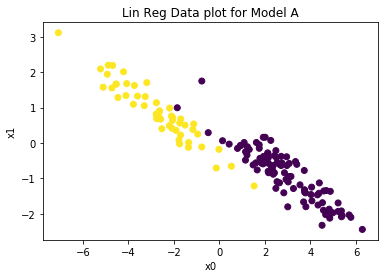

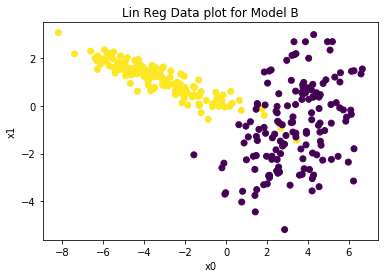

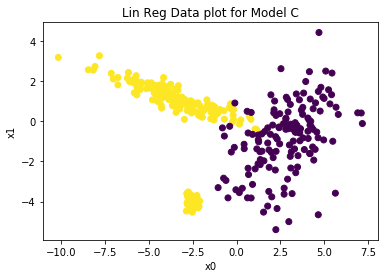

In [650]:
for name in modelNames:
    plotLinRegForModel(name)
   

### 4) Errors

#### a)

In [651]:
#def computeLDAErrorsForModel(modelName):
    

In [652]:
def computeLogRegErrorsForModel(modelName, dataSource):
    w0, w1, b = getLogRegParametersForModel(modelName)
    
    def logFunc(x0, x1):
        value = w0 * x0 + w1 * x1 + b
        return sigmoid(value)
    
    X = np.copy(data[modelName + '_' + dataSource][:, 0:2])
    Y = np.copy(data[modelName + '_' + dataSource][:, 2:3])
    
    numMissclassified = 0 
    for i in range(len(X)):
        val = logFunc(X[i][0], X[i][1])
        valPredict = 0
        if val >= 0.5:
            valPredict = 1
        if valPredict != Y[i]:
            numMissclassified +=1
    
    return numMissclassified/len(X)
        

In [667]:
def printLinRegParametersForModel(modelName):
    d_types = ['train', 'test']
    for t in d_types:
        err = computeLogRegErrorsForModel(modelName, t)
        print('For {0} data of model {1} the error rate is {2:.3f} %'.format(t,modelName,err))

In [668]:
for name in modelNames:
    printLinRegParametersForModel(name)

For train data of model A the error rate is 0.040 %
For test data of model A the error rate is 0.043 %
For train data of model B the error rate is 0.023 %
For test data of model B the error rate is 0.041 %
For train data of model C the error rate is 0.040 %
For test data of model C the error rate is 0.023 %
